In [36]:
# Logistic regression
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set(style="whitegrid")

import xgboost as xgb

from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [37]:
# loading the file into a dataframe
df = pd.read_csv('df_with_dummies_reduced.csv', index_col=0)
df.head()

age  edu_years  hours_per_week  income_code  sex_code  \
0   39         13              40            0         0   
1   50         13              13            0         0   
2   38          9              40            0         0   
3   53          7              40            0         0   
4   28         13              40            0         1   

   workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                      0                    0                  0   
1                      0                    0                  0   
2                      0                    0                  1   
3                      0                    0                  1   
4                      0                    0                  1   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                       0                           0                    1   
1                       0                           1                    0   
2                       0                           0                    0   
3                       0                           0                    0   
4                       0                           0                    0   

   education_5th-6th  education_7th-8th  education_9th-11th  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  0                   1   
4                  0                  0                   0   

   education_Assoc-acdm  education_Assoc-voc  education_Bachelors  \
0                     0                    0                    1   
1                     0                    0                    1   
2                     0                    0                    0   
3                     0                    0                    0   
4                     0                    0                    1   

   education_Doctorate  education_HS-grad  education_Masters  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  1                  0   
3                    0                  0                  0   
4                    0                  0                  0   

   education_Prof-school  education_Some-college  \
0                      0                       0   
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   

   marital_status_Divorced/Widowed  marital_status_Married-civ-spouse  \
0                                0                                  0   
1                                0                                  1   
2                                1                                  0   
3                                0                                  1   
4                                0                                  1   

   marital_status_Never-married  occupation_Adm-clerical  \
0                             1                        1   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   occupation_Craft-repair  occupation_Exec-managerial  \
0                        0                           0   
1                        0                           1   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   occupation_Farming-fishing  occupation_Handlers-cleaners  \
0                           0                             0 

In [38]:
# separating into dependent and independent variables
y = df.income_code
X = df.drop(columns=['income_code'])

In [39]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [40]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#predict the training set
y_pred_train_log = logreg.predict(X_train)

#
y_pred_test=logreg.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",f1_score(y_train, y_pred_train_log))
print("Testing F1 Score:",f1_score(y_test, y_pred_test))

Training F1 Score: 0.619375760032428
Testing F1 Score: 0.621879815100154


In [42]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[5092,  435],
       [ 792, 1009]])

Text(0.5, 257.44, 'Predicted label')

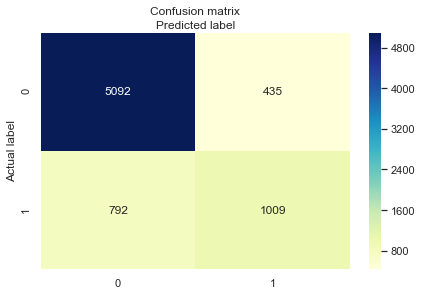

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
print("LogReg Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("LogReg Precision:",metrics.precision_score(y_test, y_pred_test))
print("LogReg Recall:",metrics.recall_score(y_test, y_pred_test))


LogReg Accuracy: 0.8325600436681223
LogReg Precision: 0.6987534626038782
LogReg Recall: 0.5602443087173792


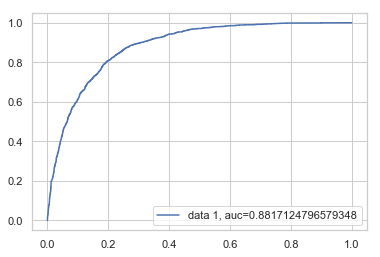

In [45]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [46]:
# baseline decision tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [47]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# training accuracy
y_pred_train_dt = clf.predict(X_train)

#Predict the response for test dataset
y_pred_tree_dt = clf.predict(X_test)

In [48]:
# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",f1_score(y_train, y_pred_train_dt))
print("Testing F1 Score:",f1_score(y_test, y_pred_tree_dt))

Training F1 Score: 0.9318718699801568
Testing F1 Score: 0.5522894290559638


In [49]:
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred_tree_dt))

Decision Tree Accuracy: 0.7838427947598253


In [76]:
# CV for decision tree
# Import Grid search
from sklearn.model_selection import GridSearchCV
parameters={ 'max_depth': range(2,20,1)}
#create the instance of GridSearchCV
grid_tree=GridSearchCV(clf,parameters,  cv=5, scoring='f1')

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

In [77]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.6278162206335718
{'max_depth': 8}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [78]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.f1_score(y_test, y_pred))
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6371532642196694
Decision Tree Accuracy: 0.8232805676855895


In [61]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

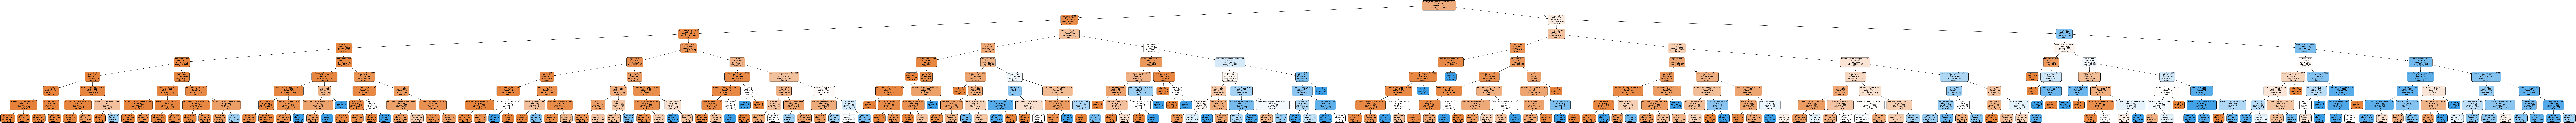

In [62]:
dot_data = StringIO()
export_graphviz(grid_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic_gs.png')
Image(graph.create_png())

In [25]:
X.columns

Index(['age', 'edu_years', 'hours_per_week', 'sex_code',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'education_5th-6th', 'education_7th-8th',
       'education_9th-11th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Prof-school', 'education_Some-college',
       'marital_status_Divorced/Widowed', 'marital_status_Married-civ-spouse',
       'marital_status_Never-married', 'occupation_Adm-clerical',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Prof-specialty', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving', 'race_Black',
       'race_Other', 'r

In [63]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [64]:
from sklearn.metrics import f1_score

In [79]:
# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid= parameters,
                  scoring=scoring, cv=5, refit='AUC', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_

In [66]:
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_AUC', 'split1_test_AUC', 'split2_test_AUC', 'split3_test_AUC', 'split4_test_AUC', 'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC', 'split0_train_AUC', 'split1_train_AUC', 'split2_train_AUC', 'split3_train_AUC', 'split4_train_AUC', 'mean_train_AUC', 'std_train_AUC', 'split0_test_Accuracy', 'split1_test_Accuracy', 'split2_test_Accuracy', 'split3_test_Accuracy', 'split4_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy', 'rank_test_Accuracy', 'split0_train_Accuracy', 'split1_train_Accuracy', 'split2_train_Accuracy', 'split3_train_Accuracy', 'split4_train_Accuracy', 'mean_train_Accuracy', 'std_train_Accuracy'])

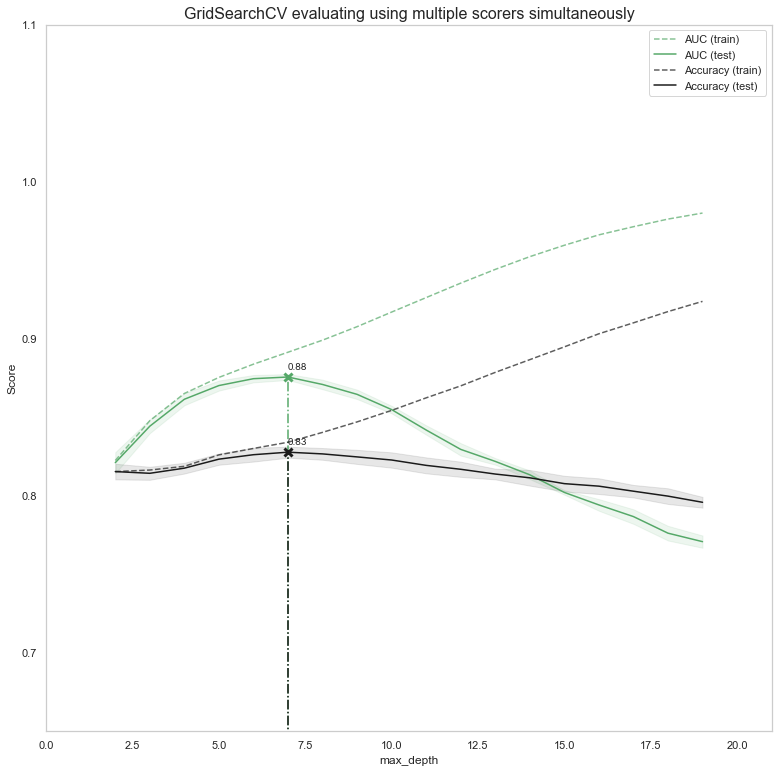

In [80]:
import numpy as np
from matplotlib import pyplot as plt



plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("max_depth")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 21)
ax.set_ylim(0.65, 1.1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [81]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfclf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfclf.fit(X_train,y_train)

y_pred_forrest=rfclf.predict(X_test)

In [83]:
#predict the training set
y_pred_train_forrest = rfclf.predict(X_train)

In [84]:
# Model Accuracy, how often is the classifier correct?
print("Random Forrest Accuracy:",metrics.accuracy_score(y_test, y_pred_forrest))

Random Forrest Accuracy: 0.8141375545851528


In [31]:
# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",f1_score(y_train, y_pred_train_forrest))
print("Testing F1 Score:",f1_score(y_test, y_pred_forrest))

Training F1 Score: 0.9337979094076655
Testing F1 Score: 0.6006408389163997


In [49]:
# baseline XGBoost

In [85]:
feature_cols = X.columns

In [86]:
xg_clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 100)

In [87]:
xg_clf.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [88]:
XGpreds = xg_clf.predict(X_test)


test_f1 = f1_score(y_test, XGpreds)
test_acc = accuracy_score(y_test, XGpreds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.833788
F1: 0.615287


In [89]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [104]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 2, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=300,early_stopping_rounds=5,metrics="auc", as_pandas=True, seed=123)
cv_results

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.755868       0.002659       0.755290      0.009635
1          0.794003       0.026172       0.793759      0.025583
2          0.817814       0.015474       0.817447      0.013997
3          0.830903       0.015150       0.830905      0.015211
4          0.842169       0.013555       0.841848      0.017431
5          0.857798       0.007866       0.857279      0.007951
6          0.861057       0.002702       0.860609      0.008103
7          0.861214       0.003084       0.860220      0.010860
8          0.864627       0.004087       0.864155      0.010756
9          0.864915       0.004191       0.864717      0.010059
10         0.866182       0.003268       0.865512      0.008938
11         0.869001       0.001402       0.868509      0.007083
12         0.869824       0.002817       0.869145      0.006165
13         0.869780       0.003020       0.869539      0.007212
14         0.871063       0.002928       0.870454      0.006419
15         0.871539       0.004003       0.870782      0.006253
16         0.871870       0.003423       0.871068      0.006398
17         0.872257       0.002856       0.871336      0.005629
18         0.872899       0.002277       0.871897      0.005456
19         0.873584       0.002253       0.872552      0.005261
20         0.874989       0.001836       0.873777      0.005625
21         0.875180       0.002182       0.874149      0.005560
22         0.875694       0.002081       0.874736      0.005744
23         0.876185       0.002019       0.875179      0.006105
24         0.876830       0.002245       0.875976      0.005276
25         0.876781       0.002429       0.876031      0.005200
26         0.877392       0.002265       0.876484      0.005113
27         0.877860       0.002227       0.877006      0.004962
28         0.878084       0.001945       0.877240      0.005107
29         0.878312       0.001793       0.877455      0.005089
..              ...            ...            ...           ...
233        0.892305       0.001410       0.889712      0.005358
234        0.892311       0.001410       0.889726      0.005355
235        0.892326       0.001414       0.889739      0.005347
236        0.892365       0.001460       0.889756      0.005327
237        0.892373       0.001459       0.889756      0.005332
238        0.892394       0.001434       0.889774      0.005361
239        0.892405       0.001438       0.889773      0.005356
240        0.892412       0.001440       0.889773      0.005351
241        0.892419       0.001442       0.889773      0.005347
242        0.892433       0.001452       0.889777      0.005340
243        0.892439       0.001451       0.889788      0.005335
244        0.892446       0.001453       0.889800      0.005342
245        0.892451       0.001456       0.889804      0.005349
246        0.892465       0.001450       0.889804      0.005347
247        0.892472       0.001449       0.889803      0.005336
248        0.892480       0.001450       0.889803      0.005335
249        0.892492       0.001450       0.889828      0.005338
250        0.892500       0.001452       0.889829      0.005336
251        0.892510       0.001452       0.889837      0.005344
252        0.892520       0.001449       0.889844      0.005345
253        0.892524       0.001448       0.889856      0.005342
254        0.892536       0.001456       0.889857      0.005343
255        0.892543       0.001448       0.889849      0.005331
256        0.892548       0.001449       0.889852      0.005328
257        0.892559       0.001449       0.889860      0.005324
258        0.892582       0.001438       0.889894      0.005349
259        0.892586       0.001437       0.889900      0.005343
260        0.892601       0.001439       0.889906      0.005336
261        0.892612       0.001441       0.889910      0.005336
262        0.892620       0.001440       0.889919      0.005341

[263 rows x 4 columns]

In [105]:
xg_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [106]:
ypred = xg_clf.predict(data_dmatrix)

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

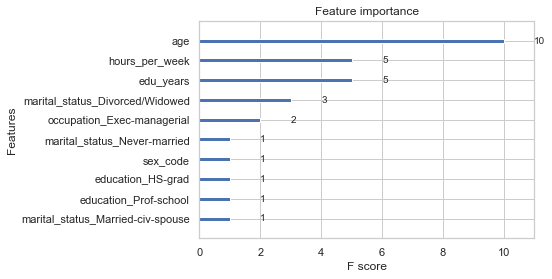

In [108]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

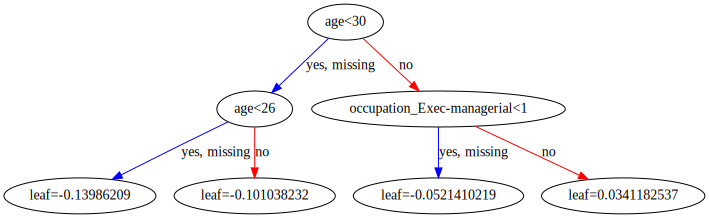

In [42]:
xgb.to_graphviz(xg_clf, num_trees=5)

In [50]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [51]:
knn = KNeighborsClassifier(n_neighbors=5)

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
# make class predictions for the testing set
y_pred_class_knn = knn.predict(X_test)

In [54]:
print('KNN Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class_knn)))
print('KNN F1: ' + str(metrics.f1_score(y_test, y_pred_class_knn)))

KNN Accuracy:0.8122270742358079
KNN F1: 0.6039147956246402


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class_knn)
classes = ['0', '1']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

NameError: name 'plot_confusion_matrix' is not defined

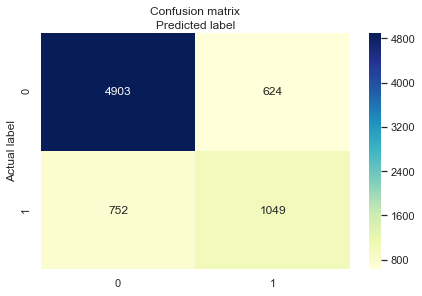

In [57]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.savefig('KNNCM.png')

In [24]:
k_range = list(range(1, 25))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.7807562625542377, 0.7794367526351282, 0.8023488484326858, 0.8010422564690161, 0.8098425301773006, 0.8066058817018914, 0.8124867357754275, 0.807966089353449, 0.8141543905197984, 0.8085550810753291, 0.8169701122155179, 0.8125479439101988, 0.8178815786844613, 0.8152548873233242, 0.8172418523466279, 0.8131404695483496, 0.816121867161053, 0.816791758913933, 0.8185771255580925, 0.8188847935952438, 0.8172366579166879, 0.8151105425691928, 0.8175176161673925, 0.8179192225128968]


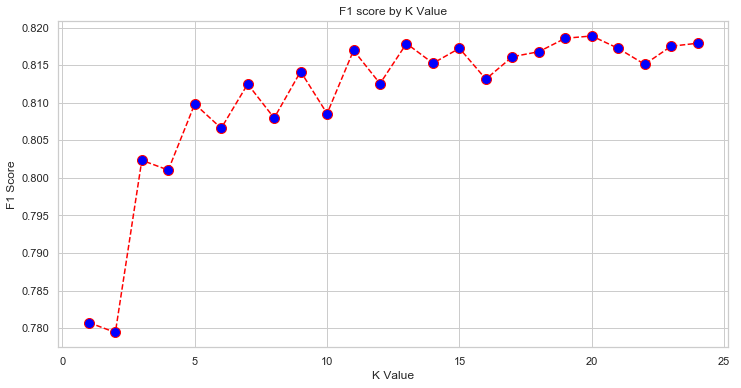

In [53]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

In [ ]:
# rescaled logreg

In [28]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#predict the training set
y_pred_train_log = logreg.predict(X_train)

#
y_pred_test=logreg.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",f1_score(y_train, y_pred_train_log))
print("Testing F1 Score:",f1_score(y_test, y_pred_test))

Training F1 Score: 0.6207035988677719
Testing F1 Score: 0.6225369458128078


In [30]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[5091,  436],
       [ 790, 1011]])

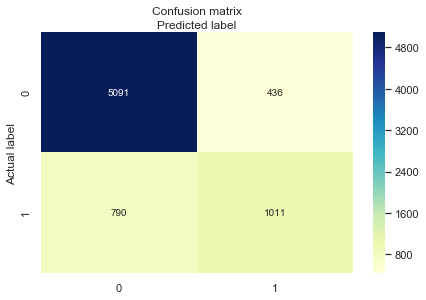

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.savefig('LogRegCM.png')


In [32]:
print("LogReg Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("LogReg Precision:",metrics.precision_score(y_test, y_pred_test))
print("LogReg Recall:",metrics.recall_score(y_test, y_pred_test))


LogReg Accuracy: 0.8326965065502183
LogReg Precision: 0.6986869384934347
LogReg Recall: 0.5613548028872848


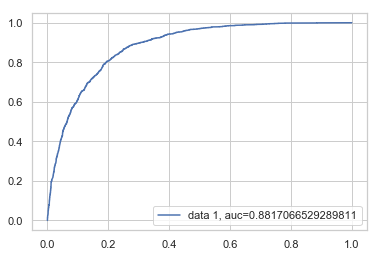

In [33]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()